# Classification with Random Forests

### Imports

In [107]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Load Data

In [108]:
df = pd.read_csv('../../data/01-modified-data/occupations_detailed_(employment_and_wage).csv')

## drop unneeded column created from read_csv
df = df.iloc[:, 1:]

### Separate Predictor and Response Variables

In [109]:
# Y="Target" COLUMN and X="everything else"
X = df.iloc[:, 2:6]
Y = df.iloc[:, 7]

### Normalization

In [110]:
X=0.1+(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))

### Numerical EDA

In [111]:
df['Target'].value_counts(ascending=True)

Legal Occupations                                              15
Building and Grounds Cleaning and Maintenance Occupations      18
Farming, Fishing, and Forestry Occupations                     24
Community and Social Service Occupations                       26
Healthcare Support Occupations                                 27
Food Preparation and Serving Related Occupations               33
Computer and Mathematical Occupations                          36
Sales and Related Occupations                                  42
Protective Service Occupations                                 43
Arts, Design, Entertainment, Sports, and Media Occupations     55
Business and Financial Operations Occupations                  58
Personal Care and Service Occupations                          60
Architecture and Engineering Occupations                       61
Management Occupations                                         73
Installation, Maintenance, and Repair Occupations              75
Life, Phys

In [112]:
corr = X.corr()
print(corr)	

            TOT_EMP  EMP_PRSE    A_MEAN  MEAN_PRSE
TOT_EMP    1.000000 -0.235767 -0.072640  -0.190195
EMP_PRSE  -0.235767  1.000000  0.115099   0.801454
A_MEAN    -0.072640  0.115099  1.000000   0.158494
MEAN_PRSE -0.190195  0.801454  0.158494   1.000000


### Correlation Matrix Heatmap

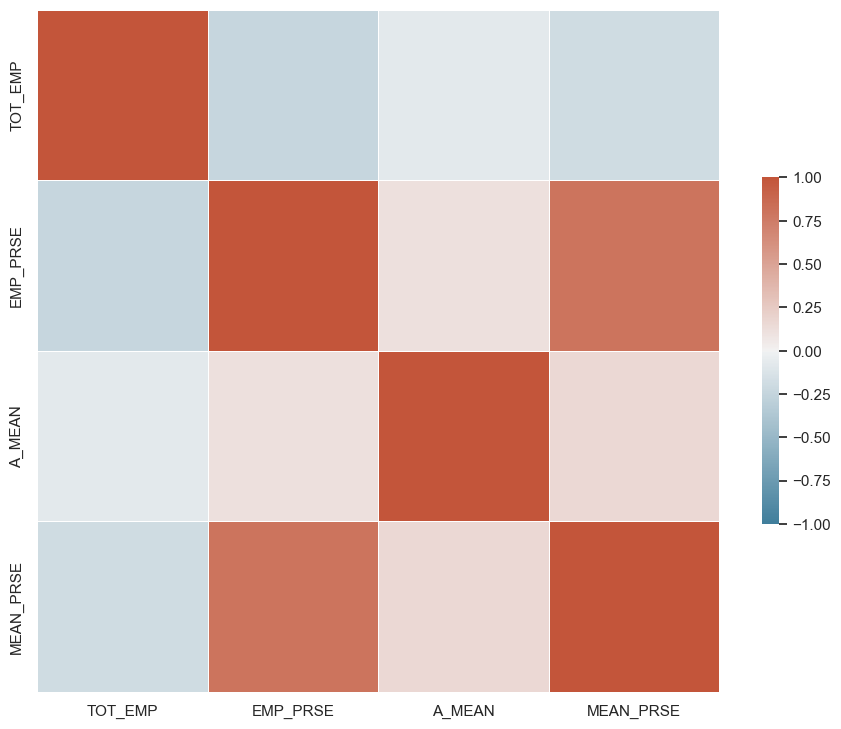

In [113]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

### Multivariable Pair Plot

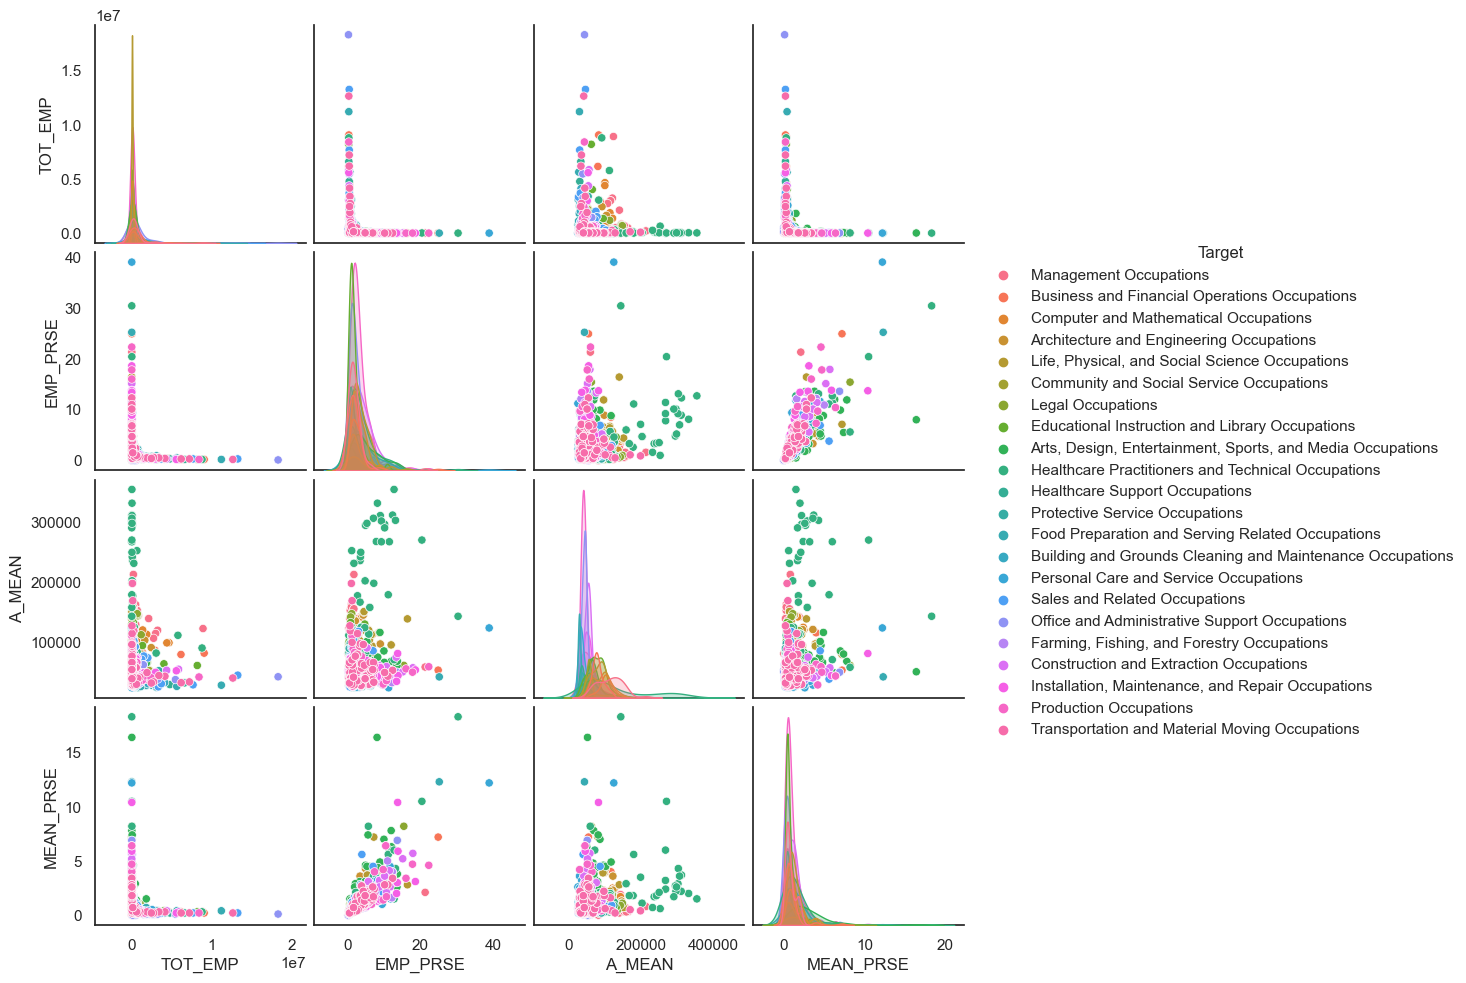

In [114]:
sns.pairplot(df.iloc[:, 2:7], hue='Target')
plt.show()

### Baseline: Random Classifier

In [115]:
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("precision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))
random_classifier(Y)

-----RANDOM CLASSIFIER-----
count of prediction: dict_values([57, 64, 62, 73, 68, 61, 75, 49, 48, 62, 64, 58, 53, 70, 55, 58, 52, 57, 68, 56, 76, 51, 57])
probability of prediction: [0.04088953 0.04591105 0.04447633 0.05236729 0.04878049 0.04375897
 0.05380201 0.03515065 0.03443329 0.04447633 0.04591105 0.04160689
 0.03802009 0.05021521 0.03945481 0.04160689 0.03730273 0.04088953
 0.04878049 0.04017217 0.05451937 0.03658537 0.04088953]
accuracy 0.04447632711621234
precision, recall, fscore, (array([0.        , 0.01785714, 0.03508772, 0.015625  , 0.03508772,
       0.06122449, 0.02083333, 0.        , 0.10294118, 0.05172414,
       0.05333333, 0.03278689, 0.01612903, 0.        , 0.01315789,
       0.0754717 , 0.01754386, 0.0625    , 0.        , 0.09677419,
       0.07142857, 0.20588235, 0.        ]), array([0.        , 0.01369863, 0.03448276, 0.02777778, 0.03278689,
       0.03797468, 0.03846154, 0.        , 0.07216495, 0.05454545,
       0.03921569, 0.07407407, 0.02325581, 0.        , 0

c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Split Data

In [116]:
X.drop(columns=['EMP_PRSE'], inplace=True)

In [117]:
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio, random_state=0, stratify=Y)

In [118]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (1115, 3)
<class 'pandas.core.series.Series'> (1115,)
<class 'pandas.core.frame.DataFrame'> (279, 3)
<class 'pandas.core.series.Series'> (279,)


### Train the Model

In [119]:
# TRAIN A SKLEARN RANDOM FOREST MODEL ON x_train,y_train 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(x_train, y_train)

### Check the Results

In [120]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [121]:
# GENERATES A CONFUSION MATRIX PLOT AND PRINTS MODEL PERFORMANCE METRICS
def confusion_plot(y_data, y_pred):    
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    
    print('ACCURACY:', accuracy_score(y_data, y_pred))
    print('RECALL:', recall_score(y_data, y_pred, average='weighted'))
    print('PRECISION:', precision_score(y_data, y_pred, average='weighted'))
    
    plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

------TRAINING------
ACCURACY: 1.0
RECALL: 1.0
PRECISION: 1.0


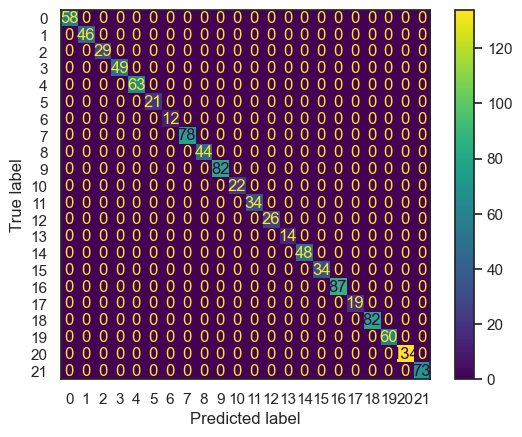

------TEST------
ACCURACY: 0.5412186379928315
RECALL: 0.5412186379928315
PRECISION: 0.5436512374188224


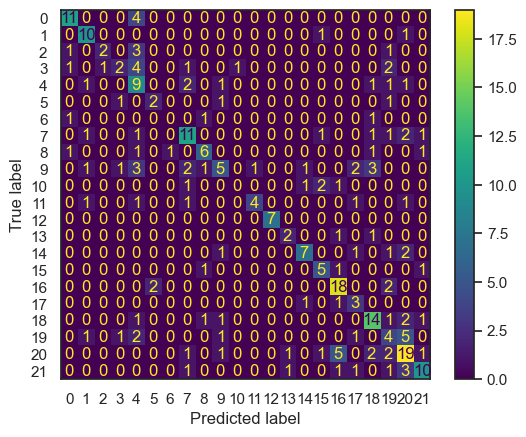

In [122]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

### Visualize the Tree

In [123]:
# VISUALIZE A SINGLE TREE
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

regr = RandomForestRegressor(random_state=1234, criterion='absolute_error')
model = regr.fit(x_train, y_train)


[Text(0.6267073331144769, 0.9782608695652174, 'A_MEAN <= 0.235\nsquared_error = 46.791\nsamples = 692\nvalue = 13.157'),
 Text(0.36693369774427975, 0.9347826086956522, 'A_MEAN <= 0.179\nsquared_error = 30.343\nsamples = 485\nvalue = 15.65'),
 Text(0.22660241131817527, 0.8913043478260869, 'TOT_EMP <= 0.102\nsquared_error = 18.116\nsamples = 312\nvalue = 16.976'),
 Text(0.09400633184630883, 0.8478260869565217, 'TOT_EMP <= 0.101\nsquared_error = 15.368\nsamples = 98\nvalue = 18.405'),
 Text(0.06051230392862282, 0.8043478260869565, 'TOT_EMP <= 0.101\nsquared_error = 17.981\nsamples = 46\nvalue = 17.071'),
 Text(0.04619369693481076, 0.7608695652173914, 'TOT_EMP <= 0.1\nsquared_error = 13.326\nsamples = 44\nvalue = 17.677'),
 Text(0.024463951647719095, 0.717391304347826, 'TOT_EMP <= 0.1\nsquared_error = 10.783\nsamples = 28\nvalue = 18.386'),
 Text(0.0069074687005324506, 0.6739130434782609, 'TOT_EMP <= 0.1\nsquared_error = 16.49\nsamples = 11\nvalue = 16.9'),
 Text(0.0046049791336883, 0.6304

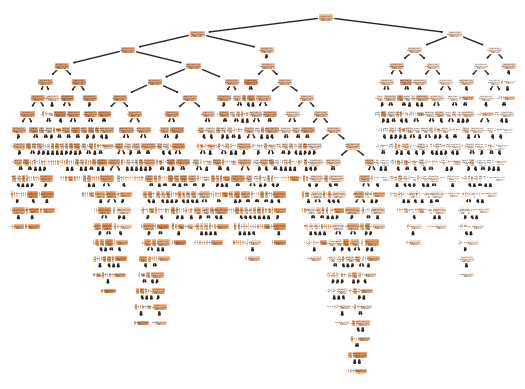

In [124]:
# VISUALIZE THE DECISION TREE
from sklearn import tree

regr = RandomForestRegressor(random_state=1234)
model = regr.fit(x_train, y_train)

tree.plot_tree(model.estimators_[0], 
            feature_names=X.columns,  
            filled=True)

### Hyperparameter Tuning

In [125]:
# LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,51):
    model = RandomForestClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test, average='weighted')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train, average='weighted')])

In [126]:
layers = [el[0] for el in test_results]
          
test_acc = [el[1] for el in test_results]
test_rec = [el[2] for el in test_results]

train_acc = [el[1] for el in train_results]
train_rec = [el[2] for el in train_results]

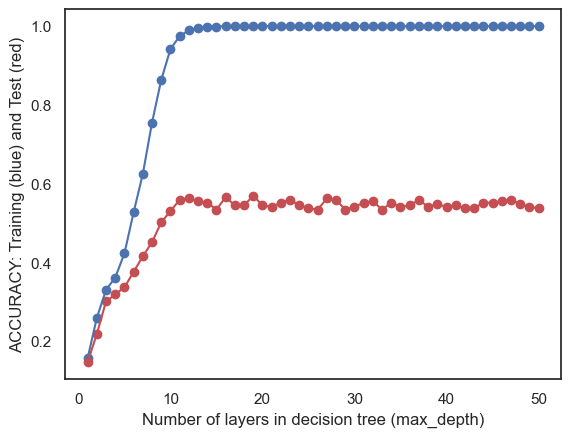

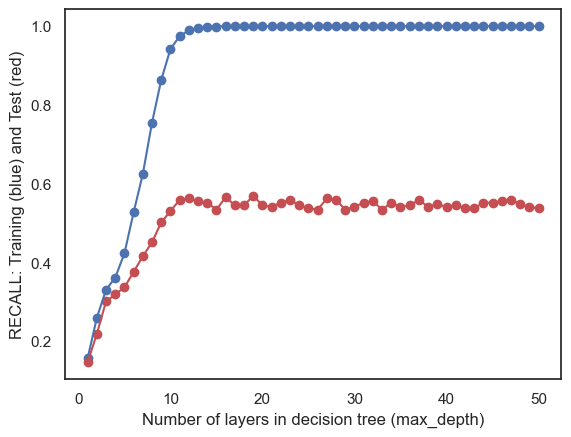

In [127]:
# GENERATE PLOTS TO IDENTIFY OPTIMAL HYPERPARAMETER
def gen_plots(x, train, test):
    plt.plot(x,train, c='b')
    plt.scatter(x,train,c='b')
    plt.plot(x,test,c='r')
    plt.scatter(x,test,c='r')
    plt.xlabel("Number of layers in decision tree (max_depth)")
    plt.show();

plt.ylabel("ACCURACY: Training (blue) and Test (red)")
gen_plots(layers, train_acc, test_acc)
plt.ylabel("RECALL: Training (blue) and Test (red)")
gen_plots(layers, train_rec, test_rec)

### Find Optimal Hyperparameter

In [128]:
# ref: https://medium.datadriveninvestor.com/random-forest-regression-9871bc9a25eb

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(1,21),
            'n_estimators': (1, 10, 50, 100, 500, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    print('Best Parameters:', best_params)
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=0, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
    return scores

In [129]:
rfr_model(X, Y)

Best Parameters: {'max_depth': 3, 'n_estimators': 10}


array([-8.29303983, -4.64902945, -5.12235353, -4.60218652, -4.45832332,
       -3.20924956, -1.79141389, -6.13868222, -5.65971537, -7.62385012])

### Train Optimal Model

In [130]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
model = RandomForestClassifier(max_depth=3, n_estimators=10)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 0.31748878923766816
RECALL: 0.31748878923766816
PRECISION: 0.31587952930847785


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


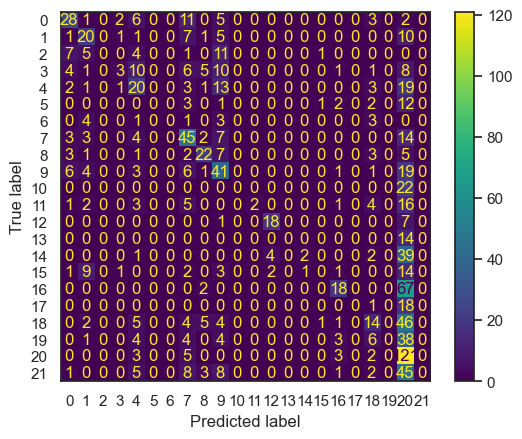

------TEST------
ACCURACY: 0.25448028673835127
RECALL: 0.25448028673835127
PRECISION: 0.18974888940531862


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


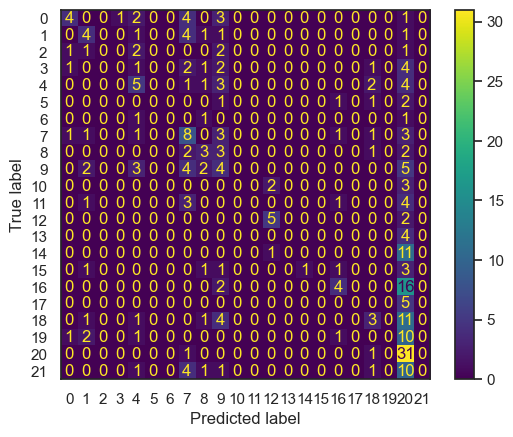

In [131]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

In [132]:
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=76577817),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=218559388),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1792203317),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2104070085),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1800969168),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=737319832),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2035828235),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=454322620),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=462865485),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=242971633)]

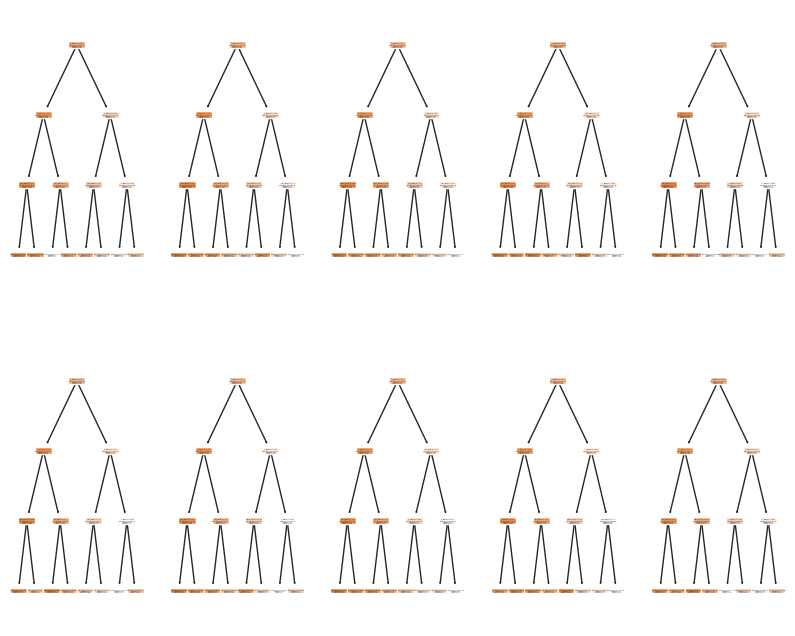

In [133]:
# VISUALIZE 5 TREES
regr = RandomForestRegressor(random_state=1234, max_depth=3, n_estimators=10)
model = regr.fit(x_train, y_train)

## ref: https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn
def plot_tree(model, X, Y):
    row=2
    col=5
    fig = plt.figure(figsize=(10,8))
    for index in range(0, 10):
        fig.add_subplot(row, col, index + 1)
        a = tree.plot_tree(model.estimators_[index], 
                    feature_names=X.columns,  
                    filled=True)
        
plot_tree(model, X, Y)